In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sp
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,\
RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import io
df = pd.read_csv('/content/drive/MyDrive/dataset.csv',encoding = "ISO-8859-1")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.shape

(81430, 61)

In [ ]:
df.head(5)

,caseId,docketId,caseIssuesId,voteId,dateDecision,decisionType,usCite,sctCite,ledCite,lexisCite,...,majVotes,minVotes,justice,justiceName,vote,opinion,direction,majority,firstAgreement,secondAgreement
0,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-01,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,86,HHBurton,2.0,1.0,1.0,1.0,NaN,NaN
1,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-02,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,84,RHJackson,1.0,1.0,2.0,2.0,NaN,NaN
2,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-03,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,81,WODouglas,1.0,1.0,2.0,2.0,NaN,NaN
3,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-04,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,80,FFrankfurter,4.0,2.0,2.0,2.0,NaN,NaN
4,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-05,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,79,SFReed,1.0,1.0,2.0,2.0,NaN,NaN


In [ ]:
#Dropping rows or columns with 60% NaN values
perc = 60.0
min_count =  int(((100-perc)/100)*df.shape[0] + 1)
df = df.dropna( axis=1,
                thresh=min_count)

In [ ]:
#Updated Dataframe shape after dropping rows or columns with 75% NaN values
df.shape

(81430, 50)

In [ ]:

df = df.drop(['decisionType', 'declarationUncon', 'caseDispositionUnusual', 'caseDisposition', 'precedentAlteration'],axis=1)

In [ ]:
#Classifying the columns into Categorial and Numerical Columns
data_numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(data_numeric_cols)
print(len(data_numeric_cols))
data_categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(data_categorical_cols)
print(len(data_categorical_cols))

['term', 'naturalCourt', 'petitioner', 'respondent', 'jurisdiction', 'threeJudgeFdc', 'caseOrigin', 'caseSource', 'lcDisagreement', 'certReason', 'lcDisposition', 'lcDispositionDirection', 'partyWinning', 'voteUnclear', 'issue', 'issueArea', 'decisionDirection', 'decisionDirectionDissent', 'authorityDecision1', 'lawType', 'lawSupp', 'majOpinWriter', 'majOpinAssigner', 'splitVote', 'majVotes', 'minVotes', 'justice', 'vote', 'opinion', 'direction', 'majority']
31
['caseId', 'docketId', 'caseIssuesId', 'voteId', 'dateDecision', 'usCite', 'sctCite', 'ledCite', 'lexisCite', 'chief', 'docket', 'caseName', 'dateArgument', 'justiceName']
14


In [ ]:
df.shape

(81430, 45)

In [ ]:
df=df.drop(data_categorical_cols,axis=1)

In [ ]:
shape = df.shape

# Printing Number of columns
print('Number of columns :', shape[1])

Number of columns : 31


In [ ]:
df.dtypes

term                          int64
naturalCourt                  int64
petitioner                    int64
respondent                  float64
jurisdiction                float64
threeJudgeFdc               float64
caseOrigin                  float64
caseSource                  float64
lcDisagreement              float64
certReason                  float64
lcDisposition               float64
lcDispositionDirection      float64
partyWinning                float64
voteUnclear                 float64
issue                       float64
issueArea                   float64
decisionDirection           float64
decisionDirectionDissent    float64
authorityDecision1          float64
lawType                     float64
lawSupp                     float64
majOpinWriter               float64
majOpinAssigner             float64
splitVote                     int64
majVotes                      int64
minVotes                      int64
justice                       int64
vote                        

In [ ]:
# It will find zero variance features
from dataclasses import dataclass
from sklearn.feature_selection import VarianceThreshold
varthres = VarianceThreshold(threshold=0)
varthres.fit(df)


VarianceThreshold(threshold=0)

In [ ]:
#This will tell us which columns are zero variance, True value indidcates Non-zero variance column, False value indicates Zero Variance Columns
varthres.get_support()
df.columns[varthres.get_support()]

Index(['term', 'naturalCourt', 'petitioner', 'respondent', 'jurisdiction',
       'threeJudgeFdc', 'caseOrigin', 'caseSource', 'lcDisagreement',
       'certReason', 'lcDisposition', 'lcDispositionDirection', 'partyWinning',
       'voteUnclear', 'issue', 'issueArea', 'decisionDirection',
       'decisionDirectionDissent', 'authorityDecision1', 'lawType', 'lawSupp',
       'majOpinWriter', 'majOpinAssigner', 'majVotes', 'minVotes', 'justice',
       'vote', 'opinion', 'direction', 'majority'],
      dtype='object')

In [ ]:
constant_columns = [column for column in df.columns
                    if column not in df.columns[varthres.get_support()]]

print(len(constant_columns))

1


In [ ]:
# These columns can be dropped
for feature in constant_columns:
  print(feature)

splitVote


In [ ]:
df=df.drop(constant_columns,axis=1)

In [ ]:
#Updated Dataframe with 36 columns
df.shape

(81430, 30)

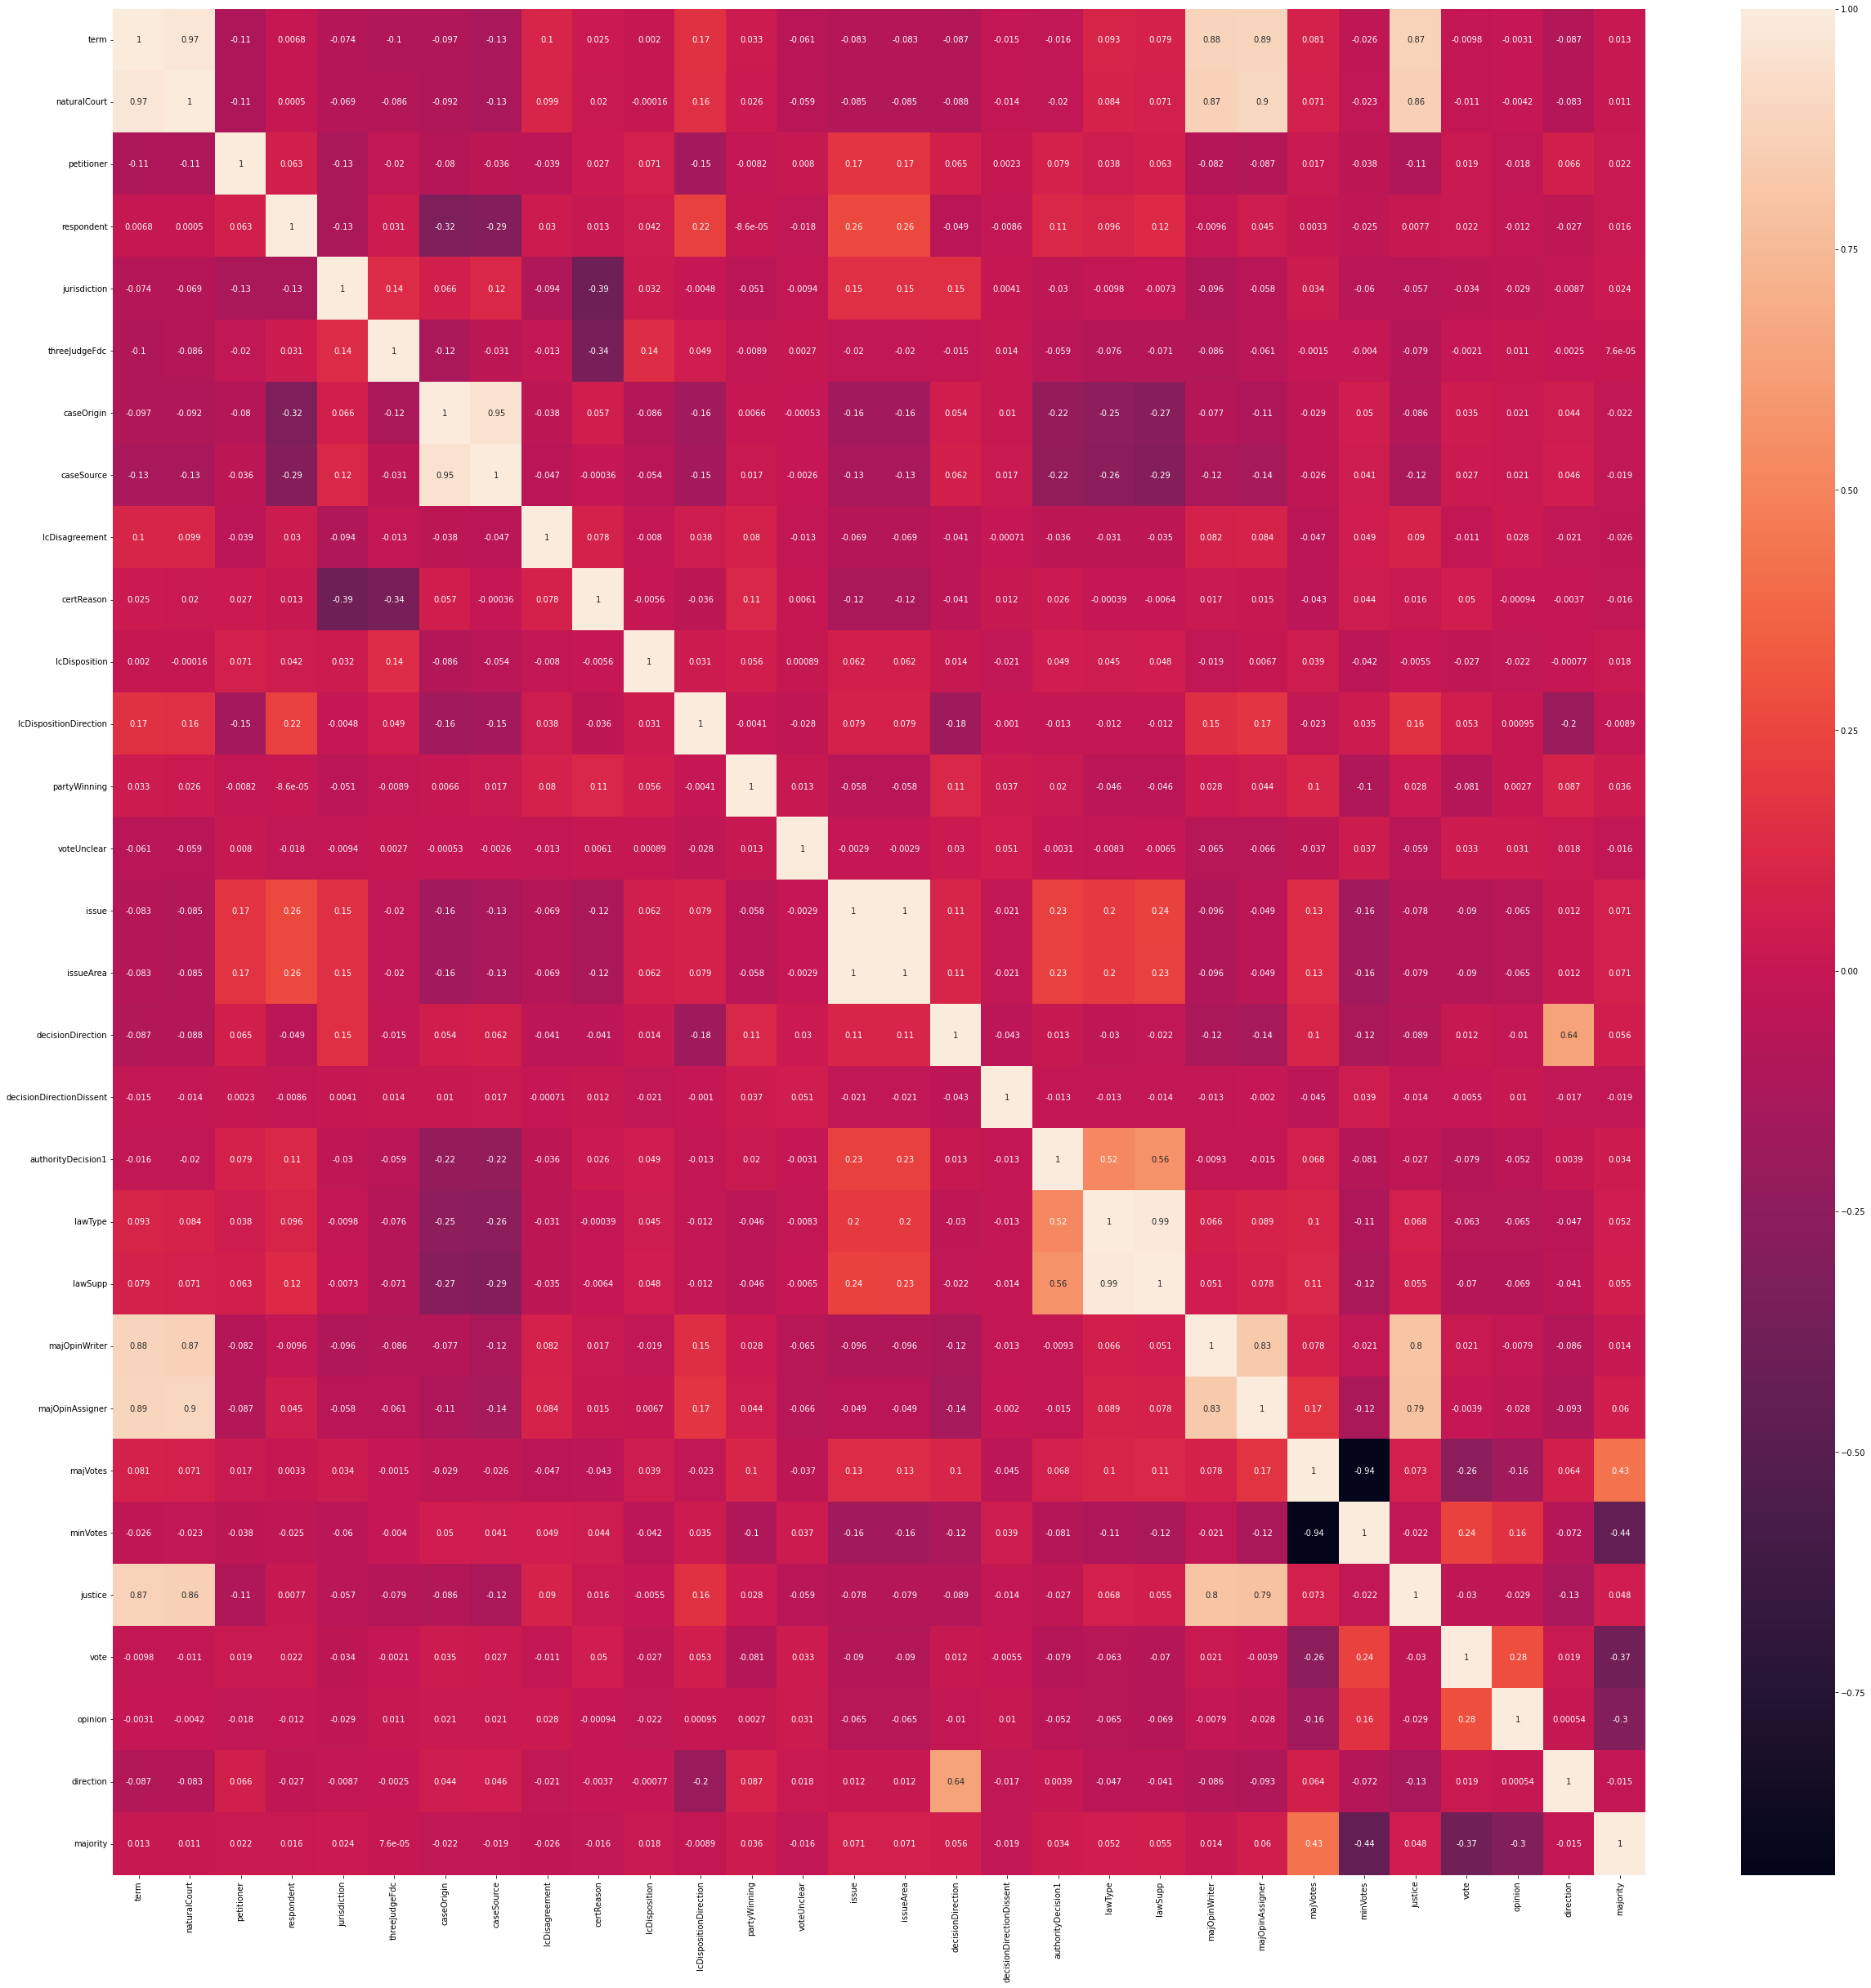

In [ ]:
plt.figure(figsize=(42,42))
sns.heatmap(df.corr(),annot=True)

In [ ]:
#Creating Correlation Matrices

In [ ]:
 #creating a square matrix with dimensions equal to the number of features. In which we will have the elements as the absolute value of correlation between the features.
 cor_matrix = df.corr().abs()
 #Selecting the Upper Triangle Matrix
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
print(to_drop)

['naturalCourt', 'caseSource', 'issueArea', 'lawSupp', 'majOpinWriter', 'majOpinAssigner', 'minVotes', 'justice']


In [ ]:
#Dropping columns suggested by Matrix Correlation Matrix
df = df.drop(to_drop, axis=1)

In [ ]:
#Updated Dataframe Shape with 32 Columns
df.shape

(81430, 22)

In [ ]:
df['partyWinning'].unique()

array([ 1.,  0., nan,  2.])

In [ ]:
df.shape

(81430, 22)

In [ ]:
df['partyWinning'].value_counts()

1.0    52070
0.0    29162
2.0       54
Name: partyWinning, dtype: int64

In [ ]:
df.isnull().sum()

term                            0
petitioner                      0
respondent                      9
jurisdiction                    9
threeJudgeFdc                 189
caseOrigin                   3108
lcDisagreement                135
certReason                    791
lcDisposition               11263
lcDispositionDirection       1893
partyWinning                  144
voteUnclear                    18
issue                         548
decisionDirection             359
decisionDirectionDissent     1853
authorityDecision1            548
lawType                     11269
majVotes                        0
vote                         2021
opinion                      2030
direction                    4649
majority                     2957
dtype: int64

In [ ]:
#No need of mapping the data of partyWinning Column because it already holds values 0 &1
df.columns


Index(['term', 'petitioner', 'respondent', 'jurisdiction', 'threeJudgeFdc',
       'caseOrigin', 'lcDisagreement', 'certReason', 'lcDisposition',
       'lcDispositionDirection', 'partyWinning', 'voteUnclear', 'issue',
       'decisionDirection', 'decisionDirectionDissent', 'authorityDecision1',
       'lawType', 'majVotes', 'vote', 'opinion', 'direction', 'majority'],
      dtype='object')

In [ ]:
df=df.fillna(-1)

In [ ]:
df.shape

(81430, 22)

In [ ]:
df['partyWinning'].value_counts()

 1.0    52070
 0.0    29162
-1.0      144
 2.0       54
Name: partyWinning, dtype: int64

In [ ]:
# Creating a dataframe with 50%
# values of original dataframe
df_train = df.sample(frac = 0.6)

# Creating dataframe with
# rest of the 50% values
df_test= df.drop(df_train.index)



In [ ]:
print(df_test.shape,df_train.shape)

(32572, 22) (48858, 22)


In [ ]:
print(df_train.columns,df_test.columns)

Index(['term', 'petitioner', 'respondent', 'jurisdiction', 'threeJudgeFdc',
       'caseOrigin', 'lcDisagreement', 'certReason', 'lcDisposition',
       'lcDispositionDirection', 'partyWinning', 'voteUnclear', 'issue',
       'decisionDirection', 'decisionDirectionDissent', 'authorityDecision1',
       'lawType', 'majVotes', 'vote', 'opinion', 'direction', 'majority'],
      dtype='object') Index(['term', 'petitioner', 'respondent', 'jurisdiction', 'threeJudgeFdc',
       'caseOrigin', 'lcDisagreement', 'certReason', 'lcDisposition',
       'lcDispositionDirection', 'partyWinning', 'voteUnclear', 'issue',
       'decisionDirection', 'decisionDirectionDissent', 'authorityDecision1',
       'lawType', 'majVotes', 'vote', 'opinion', 'direction', 'majority'],
      dtype='object')


In [ ]:
df_train['partyWinning'].value_counts()

 1.0    31230
 0.0    17507
-1.0       82
 2.0       39
Name: partyWinning, dtype: int64

In [ ]:
df_test['partyWinning'].value_counts()

 1.0    20840
 0.0    11655
-1.0       62
 2.0       15
Name: partyWinning, dtype: int64

In [ ]:
#Split the dataset into Independent & Dependent features
X=df_train.iloc[:, df_train.columns != 'partyWinning'] #Storing all Independent features except partyWinning
y=df_train.partyWinning #Storing the dependent feature ie. partyWinning

In [ ]:
X.columns

Index(['term', 'petitioner', 'respondent', 'jurisdiction', 'threeJudgeFdc',
       'caseOrigin', 'lcDisagreement', 'certReason', 'lcDisposition',
       'lcDispositionDirection', 'voteUnclear', 'issue', 'decisionDirection',
       'decisionDirectionDissent', 'authorityDecision1', 'lawType', 'majVotes',
       'vote', 'opinion', 'direction', 'majority'],
      dtype='object')

In [ ]:
#Split the dataset into Independent & Dependent features
X_val=df_test.iloc[:, df_test.columns != 'partyWinning'] #Storing all Independent features except partyWinning
y_val=df_test.partyWinning #Storing the dependent feature ie. partyWinning

In [ ]:
#Split the dataset into Independent & Dependent features
Xall=df.iloc[:, df.columns != 'partyWinning'] #Storing all Independent features except partyWinning
yall=df.partyWinning #Storing the dependent feature ie. partyWinning

In [ ]:
y_val.value_counts()

 1.0    20840
 0.0    11655
-1.0       62
 2.0       15
Name: partyWinning, dtype: int64

In [ ]:
print(X.columns,X.shape)

Index(['term', 'petitioner', 'respondent', 'jurisdiction', 'threeJudgeFdc',
       'caseOrigin', 'lcDisagreement', 'certReason', 'lcDisposition',
       'lcDispositionDirection', 'voteUnclear', 'issue', 'decisionDirection',
       'decisionDirectionDissent', 'authorityDecision1', 'lawType', 'majVotes',
       'vote', 'opinion', 'direction', 'majority'],
      dtype='object') (48858, 21)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    Xall,yall, test_size=0.25, random_state=42)

In [ ]:
y_train.value_counts()

 1.0    39008
 0.0    21911
-1.0      108
 2.0       45
Name: partyWinning, dtype: int64

In [ ]:
y_test.value_counts()

 1.0    13062
 0.0     7251
-1.0       36
 2.0        9
Name: partyWinning, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 26,max_depth=57 ,random_state = 42)
rf.fit(X_train, y_train);

In [ ]:
predictionsrf = rf.predict(X_test)
print(pd.value_counts(predictionsrf))
print(classification_report(y_test,predictionsrf))

 1.0    13058
 0.0     7255
-1.0       36
 2.0        9
dtype: int64
              precision    recall  f1-score   support

        -1.0       0.92      0.92      0.92        36
         0.0       1.00      1.00      1.00      7251
         1.0       1.00      1.00      1.00     13062
         2.0       1.00      1.00      1.00         9

    accuracy                           1.00     20358
   macro avg       0.98      0.98      0.98     20358
weighted avg       1.00      1.00      1.00     20358



In [ ]:
predictionsrf = rf.predict(X_val)
print(pd.value_counts(predictionsrf))

print(classification_report(y_val,predictionsrf))

 1.0    20835
 0.0    11659
-1.0       63
 2.0       15
dtype: int64
              precision    recall  f1-score   support

        -1.0       0.95      0.97      0.96        62
         0.0       1.00      1.00      1.00     11655
         1.0       1.00      1.00      1.00     20840
         2.0       1.00      1.00      1.00        15

    accuracy                           1.00     32572
   macro avg       0.99      0.99      0.99     32572
weighted avg       1.00      1.00      1.00     32572



In [ ]:
df2=pd.read_csv('/content/drive/MyDrive/2022scdbclear.csv')

In [ ]:
df2.columns

Index(['Unnamed: 0', 'term', 'petitioner', 'respondent', 'jurisdiction',
       'threeJudgeFdc', 'caseOrigin', 'lcDisagreement', 'certReason',
       'lcDisposition', 'lcDispositionDirection', 'caseDisposition',
       'voteUnclear', 'issue', 'decisionDirection', 'decisionDirectionDissent',
       'authorityDecision1', 'lawType', 'majVotes', 'vote', 'opinion',
       'direction', 'majority'],
      dtype='object')

In [ ]:
df2=df2.drop(['Unnamed: 0'],axis=1)
df2=df2[df2['term']>2014]
df2['term'].value_counts()

2017    684
2015    666
2018    657
2016    596
2020    585
2019    540
Name: term, dtype: int64

In [ ]:
#Split the dataset into Independent & Dependent features
X2=df2.iloc[:, df2.columns != 'partyWinning'] #Storing all Independent features except partyWinning
y2=df2.partyWinning #Storing the dependent feature ie. partyWinning

AttributeError: ignored

In [ ]:
predictionsrf = rf.predict(X2)
print(pd.value_counts(predictionsrf))
print(classification_report(y2,predictionsrf))

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression().fit(X_train, y_train)
predictionsrf = classifier.predict(X2)
print(pd.value_counts(predictionsrf))
print(classification_report(y2,predictionsrf))

In [ ]:
df.head()

In [ ]:
raw_data=df.copy()
feature_df=df.copy()
feature_df=feature_df.drop(['partyWinning','vote'],axis=1)
raw_data.shape
feature_df.columns

Index(['term', 'petitioner', 'respondent', 'jurisdiction', 'threeJudgeFdc',
       'caseOrigin', 'lcDisagreement', 'certReason', 'lcDisposition',
       'lcDispositionDirection', 'voteUnclear', 'issue', 'decisionDirection',
       'decisionDirectionDissent', 'authorityDecision1', 'lawType', 'majVotes',
       'opinion', 'direction', 'majority'],
      dtype='object')

In [ ]:
raw_data.isnull().sum()

term                        0
petitioner                  0
respondent                  0
jurisdiction                0
threeJudgeFdc               0
caseOrigin                  0
lcDisagreement              0
certReason                  0
lcDisposition               0
lcDispositionDirection      0
partyWinning                0
voteUnclear                 0
issue                       0
decisionDirection           0
decisionDirectionDissent    0
authorityDecision1          0
lawType                     0
majVotes                    0
vote                        0
opinion                     0
direction                   0
majority                    0
dtype: int64

In [ ]:
term_range = range(raw_data["term"].min() + 45,
                   raw_data["term"].max() + 1)
count=0

for term in term_range:
  count=count+1
  train_index = (raw_data.loc[:, "term"] < term).values
  test_index = (raw_data.loc[:, "term"] == term).values
  if test_index.sum() == 0:
        continue
  feature_data_train = feature_df.loc[train_index, :]
  target_data_train = (raw_data.loc[train_index, "partyWinning"]).astype(int)
  feature_data_test = feature_df.loc[test_index, :]
  target_data_test = (raw_data.loc[test_index, "partyWinning"]).astype(int)
  rf = RandomForestClassifier(n_estimators = 15,max_depth=15 ,random_state = 42)
  rf.fit(feature_data_train, target_data_train);
  raw_data.loc[test_index, "rf_predicted"] = rf.predict(feature_data_test)
  print(term)




1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020


In [ ]:
evaluation_index = raw_data.loc[:, "term"].isin(term_range)
target_actual = (raw_data.loc[evaluation_index, "partyWinning"]).astype(int)
target_predicted = raw_data.loc[evaluation_index, "rf_predicted"].astype(int)

In [ ]:
print(classification_report(target_actual, target_predicted))


              precision    recall  f1-score   support

           0       0.88      0.89      0.88      7947
           1       0.94      0.94      0.94     14714
           2       0.00      0.00      0.00        45

    accuracy                           0.92     22706
   macro avg       0.61      0.61      0.61     22706
weighted avg       0.92      0.92      0.92     22706

